In [43]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7)

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.utils import np_utils

In [44]:
# Load the data
nb_classes = 10
(X_train,y_train),(X_test,y_test) = mnist.load_data()
print("Y original size: ",y_train.shape)

Y original size:  (60000,)


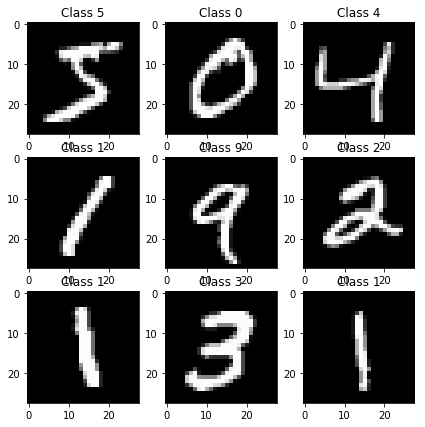

In [45]:
# Print some data
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i],interpolation='none', cmap='gray')
    plt.title('Class {}'.format(y_train[i]))

In [46]:
# Our neural network will take a single vector as input, so convert the image of size 28 x 28 into a single vector
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Also normalize the value in the range [0,1]
X_train /= 255
X_test /= 255

print('New Size {}'.format(X_train.shape))

New Size (60000, 784)


In [47]:
# Convert the class label to 'One Hot Encoding'
Y_train = np_utils.to_categorical(y_train,nb_classes)
Y_test = np_utils.to_categorical(y_test,nb_classes)
print(Y_test.shape)

(10000, 10)


In [48]:
model = Sequential()
# Input layer
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.


In [49]:
# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy') # categorical crossentropy, and is a loss function well-suited to comparing two probability distributions.


In [50]:
# Fit the model
print('X size: {}'.format(X_train.shape))
print('Y size: {}'.format(Y_train.shape))
model.fit(X_train, Y_train, batch_size=128, epochs=4,verbose=1)


X size: (60000, 784)
Y size: (60000, 10)
Epoch 1/4
60000/60000 [==============================] - 43s - loss: 0.2518      

In [51]:
# Evaluate the model
score,accuracy = model.evaluate(X_test, Y_test,verbose=0)
#print('Test score:', score[0])
#print('Test accuracy:', score[1])

TypeError: 'numpy.float64' object is not iterable

In [52]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

 9792/10000 [============================>.] - ETA: 0s 

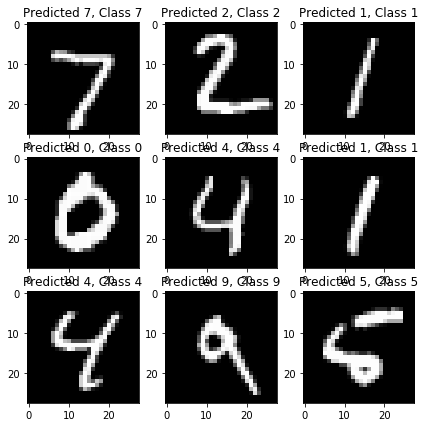

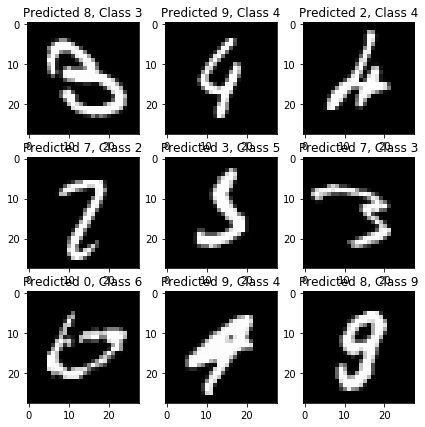

In [53]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))